In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from graphviz import Graph, Digraph
from IPython.core.display import display

In [27]:
# create our own dict
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        # binary tree
        self.left = None
        self.right = None
            
    def _repr_svg_(self, g=None):
        if g == None:
            gv = Digraph()
        else:
            gv = g
        gv.node(self.key, label="{}={}".format(self.key, self.val))
        
        if self.left != None:
            self.left._repr_svg_(gv)
            gv.edge(self.key, self.left.key, label="L")
        if self.right != None:
            self.right._repr_svg_(gv)
            gv.edge(self.key, self.right.key, label="R")
            
        return gv._repr_svg_()
    
    def add(self, key, val):
        if key < self.key:
            if self.left == None:
                self.left = Node(key, val)
            else:
                self.left.add(key, val)
        elif key > self.key:
            if self.right == None:
                self.right = Node(key, val)
            else:
                self.right.add(key, val)
        # else: do nothing (ignore duplicates)
        
    def lookup(self, key):
        display("does the tree contain "+key+"?")
        display(self)
        
        if self.key == key:
            return self.val
        
        if key < self.key:
            if self.left != None:
                childval = self.left.lookup(key)
                if childval != None:
                    return childval
        
        if key > self.key:
            if self.right != None:
                childval = self.right.lookup(key)
                if childval != None:
                    return childval
        
        return None
    
    def __getitem__(self, key):
        return self.lookup(key)
    
    def __dump(self):
        print(repr(self.key) + ": " + repr(self.val) + ",")
        if self.left != None:
            self.left.__dump()
        if self.right != None:
            self.right.__dump()
            
    def dump(self):
        print("{")
        self.__dump()
        print("}")
        
  
root = Node("C", 1)
root.add("B", 1)
root.add("A", 2)
root.add("E", 2)
root.add("D", 3)
root.add("F", 3)
root.dump()

{
'C': 1,
'B': 1,
'A': 2,
'E': 2,
'D': 3,
'F': 3,
}


'does the tree contain F?'

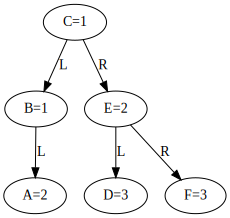

'does the tree contain F?'

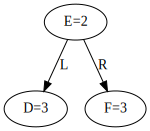

'does the tree contain F?'

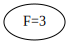

3

In [23]:
root["F"]

In [36]:
class Node:
    def __init__(self, val):
        self.val = val
        self.children = []

# undirected!
class Graph:
    def __init__(self):
        self.nodes = {}
        
    def add_node(self, name):
        n = Node(name)
        self.nodes[name] = n
        
    def add_edge(self, name1, name2):
        node1 = self.nodes[name1]
        node2 = self.nodes[name2]
        node1.children.append(node2)
        node2.children.append(node1)
        
g = Graph()
g.add_node("A")
g.add_node("B")
g.add_node("C")
g.add_edge("A", "B")
g.add_edge("B", "C")
g.has_path("A", "B")

A
B
